
## *<center>----- Banking Transactions Analysis -----</center>*
### <center>Name: "Akash Yanpure"</center>

***
### <center>Importing Libraries</center>  


In [16]:
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import selenium
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


***
### <center>Scraping Data</center>  


In [17]:
myurl = 'https://www.bankofengland.co.uk/weekly-report/balance-sheet-and-weekly-report'

# # ? ---------Navigating to site --------------#

myurl = 'https://www.bankofengland.co.uk/boeapps/database/fromshowcolumns.asp?Travel=NIxAZxSUx&FromSeries=1&ToSeries=50&DAT=RNG&FD=1&FM=Jan&FY=2018&TD=31&TM=Dec&TY=2027&FNY=Y&CSVF=TT&html.x=66&html.y=26&SeriesCodes=RPWB56A,RPWB58A,RPWB9R8,RPWBV79,RPWB55A,RPWB68A,RPWB67A,RPWBL59,RPWZ4TJ,RPWZ4TK,RPWZ4TL,RPWZ4TM,RPWZO8Q,RPWZOQ4,RPWZOQ3,RPWB59A,RPWZ4TN&UsingCodes=Y&Filter=N&title=Bank%20of%20England%20Weekly%20Report&VPD=Y'

uClient = uReq(myurl)
page_html = uClient.read()
uClient.close()

page_soup = soup(page_html, "lxml")


In [18]:
table_soup = page_soup.findAll('table',{"id":"stats-table"})[0]
# table_soup
table_df = pd.read_html(str(table_soup))[0]
frshTable = 0
column_names = {}
# table_df


In [19]:

print("\nDataset Shape : ",table_df.shape)
# print("\nDataset top 8 rows : ")
# table_df.head(7)



Dataset Shape :  (164, 18)


***
## <center>Data Cleansing</center>  

#### Dimentionality reduction and preliminary data cleansing 

In [20]:
# Dropping columns with 0 values
for colname in table_df:
    if table_df[colname].sum() == 0:
        # print(colname)
        table_df = table_df.drop(columns=colname)



In [21]:
# Renaming Columns and Maintaining Column Name Dictionary


i = 0
for colname in table_df.columns:
    # print(colname)
    if colname != 'Date' and frshTable == 0:
        # print(i)
        table_df = table_df.rename(columns={colname: i})
        column_names[i] = colname
        i = i + 1
frshTable = 1;   
print("\nNew Dataframe :")
table_df


New Dataframe :


,Date,0,1,2,3,4,5,6,7,8,9,10
0,03 Jan 18,465536,76225,4417,0,9944,547944,NaN,NaN,NaN,4415,4438
1,10 Jan 18,467473,74747,4417,0,9912,548066,NaN,NaN,NaN,4407,4430
2,17 Jan 18,469351,73972,4660,0,9939,548276,NaN,NaN,NaN,4309,4333
3,24 Jan 18,471629,73506,4660,0,9890,551009,NaN,NaN,NaN,4190,4214
4,31 Jan 18,472128,73329,4660,0,9863,551864,NaN,NaN,NaN,4191,4214
...,...,...,...,...,...,...,...,...,...,...,...,...
159,20 Jan 21,762656,84100,4788,0,14303,756777,46975.0,63996.0,12281.0,4478,4476
160,27 Jan 21,778484,84120,4788,0,14393,761217,46791.0,66617.0,12058.0,4458,4457
161,03 Feb 21,787616,84258,4793,0,14473,765657,46644.0,69867.0,12530.0,4476,4475
162,10 Feb 21,790165,84220,4603,0,14518,767137,46449.0,69867.0,12231.0,4414,4413


In [22]:
# Removing NA values

table_df[6] = table_df[6].fillna(0.0)
table_df[7] = table_df[7].fillna(0.0)
table_df[8] = table_df[8].fillna(0.0)

table_df.isna().sum()

Date    0
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
dtype: int64

***
## <center>Correlation Matrix</center>  

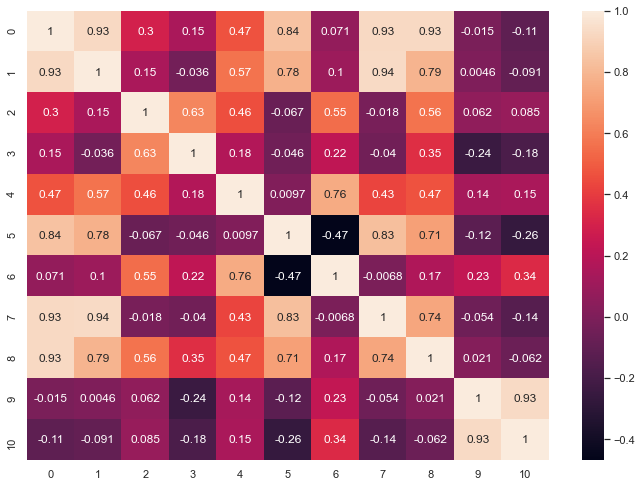

In [26]:
corrMatrix = table_df.corr()
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.heatmap(corrMatrix, annot=True)
plt.show()